In [1]:
import numpy as np
import pylab as pl
import scipy.fftpack as ff
import h5py

In [2]:
pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20
pl.rcParams['font.sans-serif'] = 'serif'
pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'medium'

pl.rcParams['xtick.major.size'] = 8
pl.rcParams['xtick.minor.size'] = 4
pl.rcParams['xtick.major.pad']  = 8
pl.rcParams['xtick.minor.pad']  = 8
pl.rcParams['xtick.color']      = 'k'
pl.rcParams['xtick.labelsize']  = 'medium'
pl.rcParams['xtick.direction']  = 'in'

pl.rcParams['ytick.major.size'] = 8
pl.rcParams['ytick.minor.size'] = 4
pl.rcParams['ytick.major.pad']  = 8
pl.rcParams['ytick.minor.pad']  = 8
pl.rcParams['ytick.color']      = 'k'
pl.rcParams['ytick.labelsize']  = 'medium'
pl.rcParams['ytick.direction']  = 'in'

### For reference
\begin{align}
\hat{V}(k) &= \int_{0}^{1} V(x)e^{-2\pi\;i\;k\;x}dx \\ \\
V(x) &= \frac{1}{Npoints}\int_{0}^{1} \hat{V}(k)e^{+2\pi\;i\;k\;x}dk \\ \\
\hat{V}(k) &= \frac{1}{4\pi^{2}\;k^2}\hat{\rho(k)} \\ \\
\hat{E}(k) &= -i(2\pi\;k)\hat{V}(k)
\end{align}

In [3]:
# FFT solver :
def fft_poisson(rho,dx):

    kspace = ff.fftfreq(len(rho), d = dx)
#     print('kspace[0]',kspace[0])
    rho_kspace = ff.fft(rho)

    V_kspace = np.zeros(len(rho))
    
    V_kspace[1:] =  (1/(4 * np.pi**2 * kspace[1:]**2)) * rho_kspace[1:]
    V_kspace[0]  =  (1/(4 * np.pi**2)) * np.sum(rho)/(len(rho)) 
#     print('rho_kspace[0] is ', rho_kspace[0])
    
    E_kspace =  -1j * 2 * np. pi * kspace * V_kspace
    
    V = ff.ifft(V_kspace)

    V = V.astype(np.double)
    
    E = ff.ifft(E_kspace)
    
    E = E.astype(np.double)
    
    return V, E

In [ ]:
# # FFT test

rho_size = 200
x = np.linspace(0, 1, rho_size )

A = 0.5
rho_0 = 0
rho =  rho_0 + A * np.cos(2 * np.pi * x)
dx = x[1] - x[0]

V, E = fft_poisson(rho, dx)

/home/tejas/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
/home/tejas/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:18: ComplexWarning: Casting complex values to real discards the imaginary part
/home/tejas/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:22: ComplexWarning: Casting complex values to real discards the imaginary part


max(V) 0.0128094253077


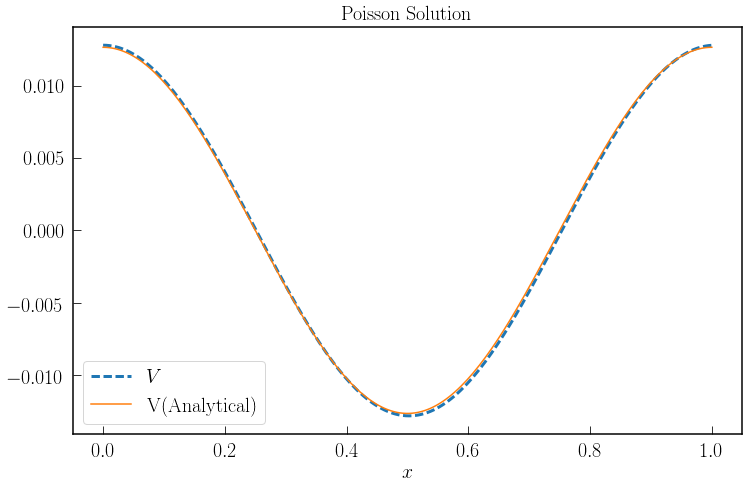

In [4]:
pl.plot(x, V,'--',lw = 3,label = '$V$')
pl.xlabel('$x$')
pl.title('$\mathrm{Poisson\;Solution}$')
# pl.plot(x, rho, label = r'$\rho$')
# pl.plot(x, ff.ifft(ff.fft(rho)), label = 'ifft(fft(rho))')
pl.plot(x, A * np.cos(2*np.pi*x)/(4 * np.pi**2), label= r'$\mathrm{V(Analytical)}$')
# pl.plot(x, E, label = '$E_{x}$')
# pl.plot(x, A * np.sin(2 * np.pi * x)/(2 * np.pi), label = '$E_{x}\;analytical$')
# pl.ylim(0,1)
pl.legend()
pl.savefig('V_fft.png')
pl.show()
pl.clf()

/home/tejas/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:482: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


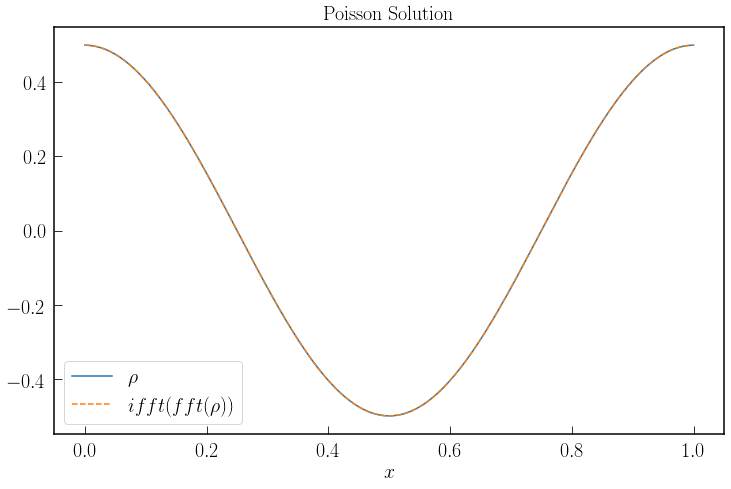

In [5]:
# pl.plot(x, V,'--',lw = 3,label = '$V$')
pl.xlabel('$x$')
pl.title('$\mathrm{Poisson\;Solution}$')
pl.plot(x, rho, label = r'$\rho$')
pl.plot(x, ff.ifft(ff.fft(rho)), '--',label = r'$ifft(fft(\rho))$')
# pl.plot(x, A * np.cos(2*np.pi*x)/(4 * np.1pi**2), label= r'$\mathrm{V(Analytical)}$')
# pl.plot(x, E, label = '$E_{x}$')
# pl.plot(x, A * np.sin(2 * np.pi * x)/(2 * np.pi), label = '$E_{x}\;analytical$')
# pl.ylim(0,1)
pl.legend()
pl.savefig('rho_fft.png')
pl.show()
pl.clf()

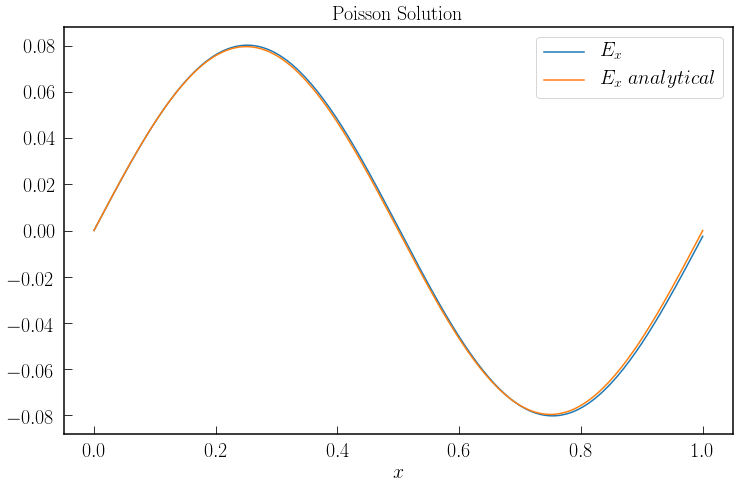

In [6]:
# pl.plot(x, V,'--',lw = 3,label = '$V$')
pl.xlabel('$x$')
pl.title('$\mathrm{Poisson\;Solution}$')
# pl.plot(x, rho, label = r'$\rho$')
# pl.plot(x, ff.ifft(ff.fft(rho)), '--',label = r'$ifft(fft(\rho))$')
# pl.plot(x, A * np.cos(2*np.pi*x)/(4 * np.1pi**2), label= r'$\mathrm{V(Analytical)}$')
pl.plot(x, E, label = '$E_{x}$')
pl.plot(x, A * np.sin(2 * np.pi * x)/(2 * np.pi), label = '$E_{x}\;analytical$')
# pl.ylim(0,1)
pl.legend()
pl.savefig('E_fft.png')
pl.show()
pl.clf()